# Exercise 2.4

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score

## a)

In [281]:
# Load data
raw_birddata = pd.read_csv('data/birds2024.csv', sep=';', index_col=0)
raw_birddata

,group,length,wspan,weight,AR,wload,back,belly,ftype
species,,,,,,,,,
naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B
harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B
isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B
kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B
lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B
suokukko,scolopacidae,25-26,46-49,90-130,6.73,0.36,dappled brown,white,C
taivaanvuohi,scolopacidae,25-27,39-45,90-110,5.91,0.40,dappled brown,white,C
lehtokurppa,scolopacidae,34-36,55-65,280-330,5.68,0.54,dappled brown,dappled beige,C
karikukko,scolopacidae,21-24,43-49,90-130,7.21,0.45,black-brown,white,C


In [282]:
def avg_from_str(str): # Get mean from a string of form 'a-b' where a and b are numbers
  min_v, max_v = str.split('-')
  return (float(max_v)+float(min_v))/2

# DF of processed numerical data
num_birddata_processed = raw_birddata.copy()[['length', 'wspan', 'weight', 'AR', 'wload']]

# Get average from ranges
num_birddata_processed.length = raw_birddata.length.map(lambda x: avg_from_str(x))
num_birddata_processed.wspan = raw_birddata.wspan.map(lambda x: avg_from_str(x))
num_birddata_processed.weight = raw_birddata.weight.map(lambda x: avg_from_str(x))

# Add more informative metrics
num_birddata_processed['BMI'] = num_birddata_processed.weight / num_birddata_processed.length**2
num_birddata_processed['WSI'] = num_birddata_processed.wspan / num_birddata_processed.length

# Min-max scaling
num_birddata_processed = num_birddata_processed.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

num_features_used = ['length', 'wspan', 'AR', 'wload', 'BMI'] # Removing weight and WSI seems to improve NMI (value shown at end part c)) quite a bit
num_birddata_processed = num_birddata_processed[num_features_used] # Comment out to use all features

num_birddata_processed

,length,wspan,AR,wload,BMI
species,,,,,
naurulokki,0.152727,0.334204,0.762605,0.060185,0.214481
harmaalokki,0.327273,0.558747,0.785714,0.212963,0.343958
isolokki,0.367273,0.624021,0.785714,0.222222,0.400416
kalatiira,0.174545,0.242820,0.974790,0.027778,0.000000
lapintiira,0.145455,0.224543,0.939076,0.009259,0.015081
suokukko,0.076364,0.099217,0.468487,0.083333,0.144386
taivaanvuohi,0.080000,0.070496,0.296218,0.101852,0.109788
lehtokurppa,0.145455,0.164491,0.247899,0.166667,0.274415
karikukko,0.054545,0.091384,0.569328,0.125000,0.222778


In [283]:
euclidian_ds = np.zeros((len(num_birddata_processed), len(num_birddata_processed))) # Initialise array for euclidian distances

# Iterate through birds and calculate distances
for i in range(len(num_birddata_processed)):
  for j in range(len(num_birddata_processed)):
    bird1 = np.array(num_birddata_processed.iloc[i, :])
    bird2 = np.array(num_birddata_processed.iloc[j, :])
    euclidian_ds[i][j] = np.linalg.norm(bird2 - bird1)
    euclidian_ds[j][i] = np.linalg.norm(bird2 - bird1)

euclidian_ds = pd.DataFrame(euclidian_ds, index=num_birddata_processed.index, columns=num_birddata_processed.index)
euclidian_ds

species,naurulokki,harmaalokki,isolokki,kalatiira,lapintiira,suokukko,taivaanvuohi,lehtokurppa,karikukko,metsäviklo,...,harmaahaikara,kattohaikara,kanahaukka,varpushaukka,hiirihaukka,mehiläishaukka,ruskosuohaukka,sinisuohaukka,haarahaukka,merikotka
species,,,,,,,,,,,,,,,,,,,,,
naurulokki,0.000000,0.348605,0.437476,0.317650,0.292531,0.391158,0.552308,0.555615,0.332005,0.355824,...,0.759981,0.882663,0.684630,0.598454,0.582336,0.602044,0.429391,0.504904,0.367114,1.260256
harmaalokki,0.348605,0.000000,0.095571,0.558109,0.563849,0.656802,0.778665,0.696219,0.601709,0.660849,...,0.655212,0.618568,0.634015,0.762852,0.577768,0.598851,0.430257,0.594710,0.282036,1.029964
isolokki,0.437476,0.095571,0.000000,0.645251,0.652795,0.738594,0.852921,0.754042,0.685077,0.747890,...,0.657629,0.567354,0.642978,0.819984,0.600397,0.621511,0.463913,0.640433,0.308503,0.961494
kalatiira,0.317650,0.558109,0.645251,0.000000,0.055011,0.557259,0.718772,0.793691,0.510700,0.477055,...,0.929775,1.084257,0.977434,0.818465,0.862664,0.874004,0.709283,0.746758,0.636524,1.549291
lapintiira,0.292531,0.563849,0.652795,0.055011,0.000000,0.513946,0.677365,0.757207,0.468234,0.430313,...,0.927632,1.091243,0.953084,0.779508,0.837074,0.848991,0.686935,0.717504,0.623993,1.539210
suokukko,0.391158,0.656802,0.738594,0.557259,0.513946,0.000000,0.179038,0.285561,0.136336,0.112191,...,0.819702,1.029868,0.615855,0.325787,0.528940,0.539935,0.479180,0.412345,0.564902,1.355872
taivaanvuohi,0.552308,0.778665,0.852921,0.718772,0.677365,0.179038,0.000000,0.216233,0.298287,0.277424,...,0.816850,1.055574,0.591413,0.221573,0.511656,0.514503,0.518181,0.397114,0.647634,1.363397
lehtokurppa,0.555615,0.696219,0.754042,0.793691,0.757207,0.285561,0.216233,0.000000,0.348322,0.393599,...,0.737897,0.917492,0.384553,0.185375,0.353770,0.363653,0.405379,0.321139,0.554190,1.162356
karikukko,0.332005,0.601709,0.685077,0.510700,0.468234,0.136336,0.298287,0.348322,0.000000,0.123951,...,0.877732,1.040747,0.635322,0.431609,0.574431,0.593136,0.505976,0.489000,0.559462,1.345367


## b)

In [284]:
# Similarity measure for colours designed for this assignment specifically:
# For the same exact colours, similarity is 1. 
# If a color consist of 2 colors, like black-brown, similarity is 0.5 if the other color matches one of them. Intuitively "half" the same color.
# If colours match but have a shade difference, e.g, grey and light grey or blueish grey and light grey, similarity is 0.75. Intuitively very similar but not the same.
# If the other colour matches the "shade" of the other, e.g. greyish black and grey, similarity is 0.75*0.75. Intuitively grey and greyish are similar but not the same, 
# hence 0.75, and greyish black and grey are further different, so multiplied by 0.75 again.
def color_sim(col1, col2):
  if col1 == col2: # Same color
    return 1
  if len(col1.split('-')) > 1 and len(col2.split('-')) > 1: # Both colors are combinations of 2 colors i.e. brown-black
    spl1, spl2 = col1.split('-')
    spl3, spl4 = col2.split('-')
    return 0.5*max(color_sim(spl1, spl3), color_sim(spl1, spl4), color_sim(spl2, spl3), color_sim(spl2, spl4))
  if len(col1.split('-')) > 1: # 1 color is a combination of 2 colors i.e. brown-black
    spl1, spl2 = col1.split('-')
    return 0.5*max(color_sim(spl1, col2), color_sim(spl2, col2))
  if len(col2.split('-')) > 1: # 1 color is a combination of 2 colors i.e. brown-black
    spl1, spl2 = col2.split('-')
    return 0.5*max(color_sim(spl1, col1), color_sim(spl2, col1))
  if len(col1.split(' ')) > 1 and len(col2.split(' ')) > 1: # Both colors have shade differences i.e. light grey
    spl1, spl2 = col1.split(' ')
    spl3, spl4 = col2.split(' ')
    return 0.75*max(color_sim(spl2, spl4), color_sim(spl2, spl3), color_sim(spl4, spl1))
  if len(col1.split(' ')) > 1: # 1 color has a shade difference i.e. light grey
    spl1, spl2 = col1.split(' ')
    return 0.75*max(color_sim(spl1, col2), color_sim(spl2, col2))
  if len(col2.split(' ')) > 1: # 1 color has a shade difference i.e. light grey
    spl1, spl2 = col2.split(' ')
    return 0.75*max(color_sim(spl1, col1), color_sim(spl2, col1))
  if col1 in col2 or col2 in col1: # 1 color includes the other i.e. greyish and grey
    return 0.75
  return 0 # Not similar at all

In [285]:
color_ds = np.zeros((len(raw_birddata), len(raw_birddata))) # Initialise array for colour distances

# Iterate through birds to calculate distance
for i in range(len(raw_birddata)):
  for j in range(len(raw_birddata)):
    col1 = raw_birddata.iloc[i, 6]
    col2 = raw_birddata.iloc[j, 6]
    col3 = raw_birddata.iloc[i, 7]
    col4 = raw_birddata.iloc[j, 7]
    color_ds[i][j] = 1 - color_sim(col1, col2) + 1 - color_sim(col3, col4) # Adding the distances for the two features
    color_ds[j][i] = color_ds[i][j]

color_ds = pd.DataFrame(color_ds, index=raw_birddata.index, columns=raw_birddata.index)
color_ds

species,naurulokki,harmaalokki,isolokki,kalatiira,lapintiira,suokukko,taivaanvuohi,lehtokurppa,karikukko,metsäviklo,...,harmaahaikara,kattohaikara,kanahaukka,varpushaukka,hiirihaukka,mehiläishaukka,ruskosuohaukka,sinisuohaukka,haarahaukka,merikotka
species,,,,,,,,,,,,,,,,,,,,,
naurulokki,0.0000,0.2500,0.2500,0.2500,0.2500,1.0000,1.0000,2.0000,1.00000,1.0000,...,0.2500,1.00000,0.7500,0.9375,1.5000,0.9375,2.0000,1.5000,2.0000,2.0000
harmaalokki,0.2500,0.0000,0.0000,0.2500,0.2500,1.0000,1.0000,2.0000,1.00000,1.0000,...,0.5000,1.00000,0.7500,0.9375,1.5000,0.9375,2.0000,1.5000,2.0000,2.0000
isolokki,0.2500,0.0000,0.0000,0.2500,0.2500,1.0000,1.0000,2.0000,1.00000,1.0000,...,0.5000,1.00000,0.7500,0.9375,1.5000,0.9375,2.0000,1.5000,2.0000,2.0000
kalatiira,0.2500,0.2500,0.2500,0.0000,0.0000,1.0000,1.0000,2.0000,1.00000,1.0000,...,0.5000,1.00000,0.5000,0.9375,1.5000,0.9375,2.0000,1.5000,2.0000,2.0000
lapintiira,0.2500,0.2500,0.2500,0.0000,0.0000,1.0000,1.0000,2.0000,1.00000,1.0000,...,0.5000,1.00000,0.5000,0.9375,1.5000,0.9375,2.0000,1.5000,2.0000,2.0000
suokukko,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.62500,0.2500,...,1.2500,1.00000,1.5000,0.7500,0.7500,0.7500,1.2500,0.7500,1.2500,1.2500
taivaanvuohi,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.62500,0.2500,...,1.2500,1.00000,1.5000,0.7500,0.7500,0.7500,1.2500,0.7500,1.2500,1.2500
lehtokurppa,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,0.0000,1.62500,1.2500,...,2.0000,2.00000,2.0000,1.2500,1.2500,1.2500,1.2500,1.2500,1.2500,1.2500
karikukko,1.0000,1.0000,1.0000,1.0000,1.0000,0.6250,0.6250,1.6250,0.00000,0.5000,...,1.2500,0.50000,1.5000,1.1250,1.1250,1.1250,1.6250,1.0000,1.6250,1.5000


In [286]:
#lambda_val = num_birddata_processed.shape[1]/(num_birddata_processed.shape[1] + 2) # Proportion of numerical features
lambda_val = 0.8 # Alternative lambda for higher weight on numerical features, yields better NMI on clustering
stdev_num = euclidian_ds.stack().std()    # Calculate std over whole df
stdev_cat = color_ds.stack().std()        # Calculate std over whole df
comb_dist = lambda_val*euclidian_ds/stdev_num + (1-lambda_val)*color_ds/stdev_cat # Formula 3.9 from the book
comb_dist

species,naurulokki,harmaalokki,isolokki,kalatiira,lapintiira,suokukko,taivaanvuohi,lehtokurppa,karikukko,metsäviklo,...,harmaahaikara,kattohaikara,kanahaukka,varpushaukka,hiirihaukka,mehiläishaukka,ruskosuohaukka,sinisuohaukka,haarahaukka,merikotka
species,,,,,,,,,,,,,,,,,,,,,
naurulokki,0.000000,0.930084,1.145524,0.855046,0.794151,1.288263,1.678918,2.026965,1.144866,1.202608,...,1.927328,2.479754,1.914681,1.769533,1.921726,1.778233,1.720976,1.734019,1.570007,3.735132
harmaalokki,0.930084,0.000000,0.231681,1.437958,1.451871,1.932229,2.227646,2.367812,1.798674,1.942039,...,1.758360,1.839544,1.791983,2.168060,1.910652,1.770495,1.723077,1.951723,1.363763,3.176867
isolokki,1.145524,0.231681,0.000000,1.649205,1.667493,2.130508,2.407655,2.507985,2.000773,2.153041,...,1.764218,1.715393,1.813709,2.306559,1.965508,1.825425,1.804665,2.062563,1.427925,3.010884
kalatiira,0.855046,1.437958,1.649205,0.000000,0.133356,1.690920,2.082456,2.604101,1.578053,1.496491,...,2.423945,2.968452,2.539479,2.302876,2.601289,2.437510,2.399482,2.320312,2.223103,4.435803
lapintiira,0.794151,1.451871,1.667493,0.133356,0.000000,1.585922,1.982076,2.515658,1.475109,1.383181,...,2.418751,2.985386,2.480451,2.208436,2.539255,2.376877,2.345308,2.249397,2.192724,4.411366
suokukko,1.288263,1.932229,2.130508,1.690920,1.585922,0.000000,0.434018,1.032279,0.543021,0.356978,...,2.412133,2.836605,2.002983,1.044785,1.537263,1.563917,1.586650,1.254617,1.794456,3.711899
taivaanvuohi,1.678918,2.227646,2.407655,2.082456,1.982076,0.434018,0.000000,0.864217,0.935618,0.757531,...,2.405220,2.898920,1.943731,0.792152,1.495363,1.502265,1.681196,1.217695,1.995012,3.730142
lehtokurppa,2.026965,2.367812,2.507985,2.604101,2.515658,1.032279,0.864217,0.000000,1.396940,1.379189,...,2.468846,2.904216,1.612282,0.874418,1.282637,1.306594,1.407744,1.203534,1.768488,3.242784
karikukko,1.144866,1.798674,2.000773,1.578053,1.475109,0.543021,0.935618,1.396940,0.000000,0.470494,...,2.552808,2.692961,2.050173,1.428827,1.775052,1.820395,1.779120,1.525449,1.908779,3.771441


## c)

In [287]:
# Agglomerative hierarchical clustering
n_clusters = 11       # 11 is the number of clusters which yields highest NMI
linkage = 'complete'  # Ward linkage doesn't work with precomputed matrix. Complete yields better results than average. Single is the worst.
clustering = AgglomerativeClustering(n_clusters, metric='precomputed', linkage=linkage).fit(comb_dist) 

clustering.labels_

array([ 3,  5,  5,  3,  3,  4,  4,  2,  4,  4,  4,  4,  4,  4,  4,  4,  2,
        6,  2,  2,  2,  6,  6,  6,  0,  7,  1,  2,  2,  2,  0,  2,  0,  5,
        6,  6,  2,  5,  8, 10,  1,  1,  0,  2, 10, 10, 10, 10, 10,  9])

In [288]:
# Show clustering in dataframe
clustered_birddata = raw_birddata.copy()
clustered_birddata['cluster'] = clustering.labels_
clustered_birddata.sort_values(by='cluster')

,group,length,wspan,weight,AR,wload,back,belly,ftype,cluster
species,,,,,,,,,,
merihanhi,anserinae,75-90,149-168,2500-3500,6.57,1.09,dappled brown,light grey,C,0
nokikana,rallidae,36-38,70-80,600-900,5.71,1.16,greyish black,greyish black,C,0
kanahaukka,accipitridae,49-64,93-127,750-1700,5.38,0.66,grey,black-white,A,0
merimetso,phalacrocoracidae,90-100,121-149,2300-3500,6.54,1.02,black,black,C,0
kattohaikara,ardeidae,100-115,180-215,2500-4000,6.41,0.86,black-white,white,A,1
harmaahaikara,ardeidae,90-100,155-175,930-1150,5.88,0.40,light grey,greyish white,B,1
kurki,gruifores,110-120,185-220,4000-6000,6.30,1.00,grey,grey,C,1
lehtokurppa,scolopacidae,34-36,55-65,280-330,5.68,0.54,dappled brown,dappled beige,C,2
heinätavi,dabbling ducks,37-41,59-67,300-550,5.80,0.76,dappled brown,beige,C,2


In [289]:
# Mappings to get more general groupings from the original group
second_level = {'laridae': 'lari', 'sternidae': 'lari', 'scolopacidae': 'charadrii', 'charadriidae': 'charadrii', 'haematopodidae': 'charadrii', 
                'dabbling ducks': 'anatinae', 'diving ducks': 'anatinae', 'gruifores': 'gruidae'} # The last one is a typo in the data I think?
highest_level = {'lari': 'charadriiformes', 'charadrii': 'charadriiformes', 'anatinae': 'anatidae', 'anserinae': 'anatidae', 
                 'gruidae': 'gruiformes', 'rallidae': 'gruiformes', 'accipitridae': 'accipitriformes'}

all_cat_data = clustered_birddata.copy()
all_cat_data['group_2'] = all_cat_data["group"].map(second_level).fillna(all_cat_data["group"])
all_cat_data['group_3'] = all_cat_data["group_2"].map(highest_level).fillna(all_cat_data["group_2"])
all_cat_data.sort_values(by='cluster')

,group,length,wspan,weight,AR,wload,back,belly,ftype,cluster,group_2,group_3
species,,,,,,,,,,,,
merihanhi,anserinae,75-90,149-168,2500-3500,6.57,1.09,dappled brown,light grey,C,0,anserinae,anatidae
nokikana,rallidae,36-38,70-80,600-900,5.71,1.16,greyish black,greyish black,C,0,rallidae,gruiformes
kanahaukka,accipitridae,49-64,93-127,750-1700,5.38,0.66,grey,black-white,A,0,accipitridae,accipitriformes
merimetso,phalacrocoracidae,90-100,121-149,2300-3500,6.54,1.02,black,black,C,0,phalacrocoracidae,phalacrocoracidae
kattohaikara,ardeidae,100-115,180-215,2500-4000,6.41,0.86,black-white,white,A,1,ardeidae,ardeidae
harmaahaikara,ardeidae,90-100,155-175,930-1150,5.88,0.40,light grey,greyish white,B,1,ardeidae,ardeidae
kurki,gruifores,110-120,185-220,4000-6000,6.30,1.00,grey,grey,C,1,gruidae,gruiformes
lehtokurppa,scolopacidae,34-36,55-65,280-330,5.68,0.54,dappled brown,dappled beige,C,2,charadrii,charadriiformes
heinätavi,dabbling ducks,37-41,59-67,300-550,5.80,0.76,dappled brown,beige,C,2,anatinae,anatidae


In [290]:
# Calculate NMI between the true grouping and the clustering
group = 'group_2' # Either group, group_2 or group_3
true_grouping = all_cat_data[group]
true_labels = np.array(true_grouping.map({group: i for i, group in enumerate(pd.unique(true_grouping))}))
true_labels
# NMI
nmi = normalized_mutual_info_score(true_labels, clustering.labels_)
print("NMI:                 ", nmi)
print("\nWhen")
print("Number of clusters:  ", n_clusters)
print("Linkage:             ", linkage)
print("Biological grouping: ", group)
print("Numerical features:  ", num_features_used)
print("Lambda eq. 3.9:      ", lambda_val)

NMI:                  0.6845493480173185

When
Number of clusters:   11
Linkage:              complete
Biological grouping:  group_2
Numerical features:   ['length', 'wspan', 'AR', 'wload', 'BMI']
Lambda eq. 3.9:       0.8


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [80.0, 80.0, 103.75, 103.75],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [160.0, 160.0, 191.875, 191.875],
  [140.0, 140.0, 175.9375, 175.9375],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [293.75, 293.75, 330.0, 330.0],
  [251.25, 251.25, 311.875, 311.875],
  [157.96875, 157.96875, 281.5625, 281.562

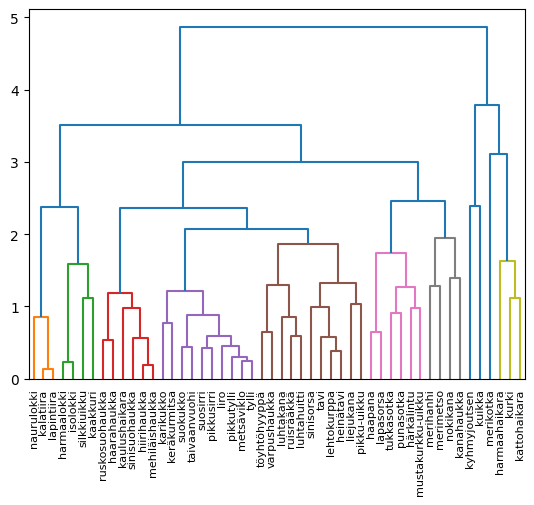

In [292]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
condensed_dists = squareform(comb_dist)
Z = linkage(condensed_dists, method = 'complete', metric='precomputed')
dendrogram(Z, labels = raw_birddata.index, color_threshold = 2)

In [297]:
all_cat_data.sort_values(by='cluster').to_csv("clustered_data.csv")